####UNIVERSIDADE DE SÃO PAULO - INSTITUTO DE GEOCIÊNCIAS - AGOSTO 2024
#####Profa. Luizemara Szameitat (luizemara@gmail.com)

# **Materiais de Geofísica Aplicada I**

##Gravimetria - Resposta de corpos regulares - Corpo esférico



### Valores para o exemplo
- Densidade do corpo: 3300 kg/m^3
- Densidade do terreno cristalino: 2700 kg/m^3
- Contraste de densidade Δρ: 3300 - 2700 = 600 kg/m^3
- Raio da esfera: 2500 m
- Profundidade do topo do corpo: 100 m
- Profundidade do centro da esfera: 2600 m

<h1 style="text-align: center;">
    <img src="https://raw.githubusercontent.com/lszam/geofex/ad72af8543cf4ce598a73ff622d81cc1e0188133/assets/img/vaca-esferica.png" alt="Vaca Esférica" width="100" height="100">
</h1>

Criador: Luizemara Szameitat (contato@lszameitat.com)


**Na célula abaixo estão as variáveis. Você pode testar outros valores!!!**

In [1]:
# Constantes
G = 6.67430e-11  # constante gravitacional em m^3 kg^-1 s^-2
rho_contrast = 600  # kg/m^3
radius = 2500  # em metros
depth = 3000  # centro do corpo, em metros

M = 100  # Magnetização em A/m
incl_local = -25.5  # Inclinação magnética em graus para Catalão
decl_local = -19.0  # Declinação magnética em graus para Catalão

## **Cálculo das anomalias de uma esfera**


A fórmula da anomalia gravimétrica de um corpo esférico é:

$$ \Delta g = \frac{4}{3} \pi G \Delta \rho \frac{a^3}{(r^2 + z^2)^{3/2}} $$

onde

$\ \Delta g\ \$ : anomalia gravimétrica

$\ G \$ : constante gravitacional \((6.67430 × 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2})\)

$\ Δρ \$: contraste de densidade entre o corpo e o meio

$\ a \$: raio da esfera

$\ r \$: a distância horizontal do ponto de observação ao centro da esfera

$\ z \$: a profundidade do centro da esfera

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a anomalia gravimétrica
def grav_anomaly(r, rho_contrast, radius, depth):
    anomaly =  (4/3) * np.pi * G * rho_contrast * (radius**3) / ((r**2 + depth**2)**(3/2))
    return anomaly * 100000  # já converte de m/s² para mGal

##**Perfil - Anomalia da esfera**

Criar um perfil ao longo do eixo horizontal para representar as anomalias

In [3]:
# Perfil em x
x = np.linspace(-10000, 10000, 500)
z = np.zeros_like(x)

#Aplicacao da função que calcula a anomalia
anomalia_grav = grav_anomaly(x, rho_contrast, radius, depth)

Plotar o gráfico

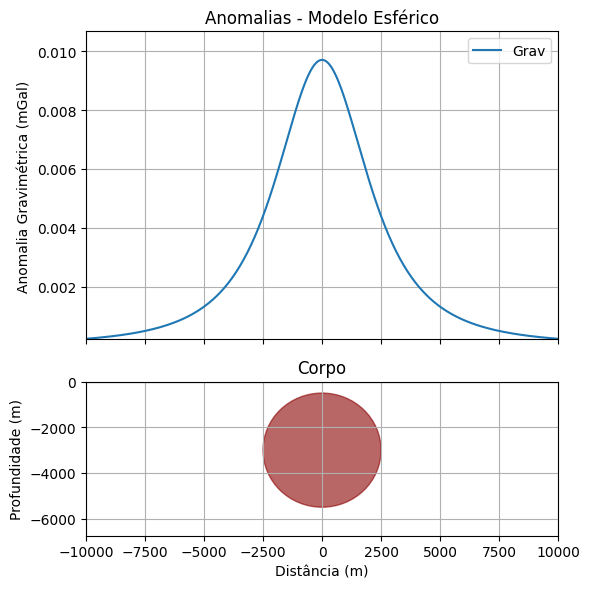

In [4]:
# Definir limites comuns para os eixos x e y dinamicamente
common_xlim = [min(x), max(x)]
common_ylim_grav = [min(anomalia_grav) - 0.1 * abs(min(anomalia_grav)), max(anomalia_grav) + 0.1 * abs(max(anomalia_grav))]

# Plotar as anomalias magnéticas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(x, anomalia_grav, label='Grav')
ax1.set_ylabel('Anomalia Gravimétrica (mGal)')
ax1.set_title('Anomalias - Modelo Esférico')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(common_ylim_grav)

# Plotar a esfera
ax2.plot(x, z, 'k')  # Linha de referência no nível do solo
circle = plt.Circle((0, -depth), radius, color='darkred', alpha=0.6)
ax2.add_patch(circle)
ax2.set_xlim(common_xlim)
ax2.set_ylim([-depth - radius*1.5, 0])
ax2.set_aspect('auto')  # Ajustar a escala para manter as proporções
ax2.set_xlabel('Distância (m)')
ax2.set_ylabel('Profundidade (m)')
ax2.set_title('Corpo')
ax2.grid(True)

plt.tight_layout()
plt.show()


##**Desafio!**
###Mude a profundidade da esfera. O que aconteceu com a anomalia?
###Mude o tamanho da esfera. O que aconteceu com a anomalia?


